本节将介绍二分类模型评价指标中的**ROC-AUC原理、手算过程与sklearn实践**

# ROC曲线（Receiver Operating Characteristic Curve）

## ROC曲线基本原理

**ROC曲线**是一种通过分类器阈值变化来描绘模型分类能力的图形方法。它展示了不同阈值下，分类器的真阳性率（True Positive Rate, TPR）和假阳性率（False Positive Rate, FPR）的关系。

- **真阳性率（TPR）**：表示模型正确识别为正类的样本占所有实际为正类的比例。公式为

$$\text{TPR} = \frac{\text{TP}}{\text{TP + FN}}$$

其中，$\text{TP}$是将正类样本预测为正类的数量，$\text{FN}$是将正类样本预测为负类的数量

- **假阳性率（FPR）**：真实负类中被预测为正类的样本占所有实际为负类的比例。公式为

$$\text{FPR} = \frac{\text{FP}}{\text{FP + TN}}$$

其中，$\text{FP}$是将负类样本预测为正类的数量，$\text{TN}$是将负类样本预测为负类的数量

## ROC曲线组成结构

- **横轴（FPR）**：假阳性率，表示负类样本被错误地预测为正类的比例。
- **纵轴（TPR）**：真阳性率，表示正类样本被正确预测为正类的比例。
- **曲线的形状**：理想情况下，ROC曲线应尽量接近左上角。即高TPR（接近1）且低FPR（接近0）是理想的性能表现。
    - 如果模型性能很差，曲线将接近对角线（从左下到右上的直线），这意味着模型的预测性能与随机猜测相差无几。
    - 如果模型完美，曲线会从左下角直接跳到左上角，然后横向到右上角，形成一个“L”形。



ROC曲线的横轴是FPR，纵轴是TPR。随着分类器阈值的变化，FPR和TPR会变化，ROC曲线描绘了这种变化的关系

## ROC曲线绘制流程

- **模型预测**：在进行二分类任务时，模型输出一个概率值（通常是正类的预测概率）。
- **概率排序**：将样本按 **预测概率从高到低** 排序，如果概率相同则正样本（标签=1）优先
- **选择不同的阈值**：从高到低依次选择每个样本的预测概率作为分类阈值。模型根据这些分类阈值将这些概率值转换为“正”或“负”类别的预测结果。
- **计算TPR和FPR**：对于每个阈值，计算相应的真阳性率（TPR）和假阳性率（FPR）。
- **绘制曲线**：将所有的（FPR, TPR）点在二维平面上绘制出来，横轴是FPR，纵轴是TPR，得到的曲线即为ROC曲线。

## ROC曲线绘制案例

**案例数据**

| 样本ID | 真实标签 | 预测概率 |
|--------|----------|----------|
| 1      | 1        | 0.78     |
| 2      | 1        | 0.49     |
| 3      | 0        | 0.09     |
| 4      | 0        | 0.23     |
| 5      | 0        | 0.37     |
| 6      | 1        | 0.56     |
| 7      | 0        | 0.43     |
| 8      | 0        | 0.40     |
| 9      | 1        | 0.26     |
| 10     | 0        | 0.25     |
| 11     | 1        | 0.89     |
| 12     | 1        | 0.90     |
| 13     | 1        | 0.63     |
| 14     | 0        | 0.58     |
| 15     | 0        | 0.16     |

### 将样本按 **预测概率从高到低** 排序，如果概率相同则正样本（标签=1）优先

| 样本ID | 预测概率 | 真实标签 |
|--------|----------|----------|
| 12     | 0.90     | 1        |
| 11     | 0.89     | 1        |
| 1      | 0.78     | 1        |
| 13     | 0.63     | 1        |
| 14     | 0.58     | 0        |
| 6      | 0.56     | 1        |
| 2      | 0.49     | 1        |
| 7      | 0.43     | 0        |
| 8      | 0.40     | 0        |
| 5      | 0.37     | 0        |
| 9      | 0.26     | 1        |
| 10     | 0.25     | 0        |
| 4      | 0.23     | 0        |
| 15     | 0.16     | 0        |
| 3      | 0.09     | 0        |

### 遍历阈值计算TPR/FPR

#### **阈值 = 0.90**  
- 对于 阈值 = 0.9，预测概率大于等于0.9的样本将被预测为正类。
    - 预测为正类的样本：样本12（概率≥0.90）  
    - 预测为负类的样本：其余所有样本  
- 计算：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12（1个）
  - FP（假阳性） = 真实为0但预测为1的样本：无（0个）
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,14,15（8个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本1,2,6,9,11,13（6个）
- TPR 和 FPR 计算：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{1}{1 + 6} \approx 0.1429$ 
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{0}{0 + 8} = 0.0$
- 结果：阈值 = 0.90时，FPR = 0.0，TPR = 0.1429  

#### **阈值 = 0.89**  
- 对于阈值 = 0.89，预测概率大于等于0.89的样本将被预测为正类。  
    - 预测为正类的样本：样本12, 11（概率≥0.89）  
    - 预测为负类的样本：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11（2个）  
  - FP（假阳性） = 真实为0但预测为1的样本：无（0个）  
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,14,15（8个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本1,2,6,9,13（5个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{2}{2 + 5} \approx 0.2857$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = 0.0$  
- **结果**：阈值 = 0.89时，FPR = 0.0，TPR = 0.2857  

#### **阈值 = 0.78**  
- 对于阈值 = 0.78，预测概率大于等于0.78的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1（概率≥0.78）  
    - **预测为负类的样本**：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11, 1（3个）
  - FP（假阳性） = 真实为0但预测为1的样本：无（0个）  
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,14,15（8个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本2,6,9,13（4个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{3}{3 + 4} \approx 0.4286$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = 0.0$  
- **结果**：阈值 = 0.78时，FPR = 0.0，TPR = 0.4286  

#### **阈值 = 0.63**  
- 对于阈值 = 0.63，预测概率大于等于0.63的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13（概率≥0.63）  
    - **预测为负类的样本**：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11, 1, 13（4个）
  - FP（假阳性） = 真实为0但预测为1的样本：无（0个）  
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,14,15（8个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本2,6,9（3个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{4}{4 + 3} \approx 0.5714$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = 0.0$  
- **结果**：阈值 = 0.63时，FPR = 0.0，TPR = 0.5714  

#### **阈值 = 0.58**  
- 对于阈值 = 0.58，预测概率大于等于0.58的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14（概率≥0.58）  
    - **预测为负类的样本**：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11, 1, 13（4个）
  - FP（假阳性） = 真实为0但预测为1的样本：样本14（1个） 
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,15（7个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本2,6,9（3个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{4}{4 + 3} \approx 0.5714$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{1}{1 + 7} = 0.125$  
- **结果**：阈值 = 0.58时，FPR = 0.125，TPR = 0.5714  

#### **阈值 = 0.56**  
- 对于阈值 = 0.56，预测概率大于等于0.56的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6（概率≥0.58）  
    - **预测为负类的样本**：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11, 1, 13, 6（5个）
  - FP（假阳性） = 真实为0但预测为1的样本：样本14（1个） 
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,15（7个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本2,9（2个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{5}{5 + 2} \approx 0.7143$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{1}{1 + 7} = 0.125$  
- **结果**：阈值 = 0.56时，FPR = 0.125，TPR = 0.7143  

#### **阈值 = 0.49**  
- 对于阈值 = 0.49，预测概率大于等于0.49的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2（概率≥0.58）  
    - **预测为负类的样本**：其余所有样本  
- **计算**：  
  - TP（真阳性） = 真实为1且预测为1的样本：样本12, 11, 1, 13, 6, 2（6个）
  - FP（假阳性） = 真实为0但预测为1的样本：样本14（1个） 
  - TN（真阴性） = 真实为0且预测为0的样本：样本3,4,5,7,8,10,15（7个）
  - FN（假阴性） = 真实为1但预测为0的样本：样本9（1个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{6}{6 + 1} \approx 0.8571$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{1}{1 + 7} = 0.125$  
- **结果**：阈值 = 0.49时，FPR = 0.125，TPR = 0.8571  

#### **阈值 = 0.43**  
- 对于阈值 = 0.43，预测概率大于等于0.43的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7（概率≥0.43）  
    - **预测为负类的样本**：其余所有样本（样本3,4,5,8,9,10,15）
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2（6个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7（2个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,4,5,8,10,15（6个）**  
  - **FN** = 真实为1但预测为0的样本：**样本9（1个）**  
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{6}{6 + 1} \approx 0.8571$  
  - $\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \frac{2}{2 + 6} = 0.25$  
- **结果**：阈值 = 0.43时，FPR = 0.25，TPR = 0.8571  

#### **阈值 = 0.40**  
- 对于阈值 = 0.40，预测概率大于等于0.40的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8（概率≥0.40）  
    - **预测为负类的样本**：其余所有样本（样本3,4,5,9,10,15）  
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2（6个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8（3个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,4,5,10,15（5个）**  
  - **FN** = 真实为1但预测为0的样本：**样本9（1个）**  
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{6}{6 + 1} \approx 0.8571$  
  - $\text{FPR} = \frac{3}{3 + 5} = 0.375$  
- **结果**：阈值 = 0.40时，FPR = 0.375，TPR = 0.8571  

#### **阈值 = 0.37**  
- 对于阈值 = 0.37，预测概率大于等于0.37的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8, 5（概率≥0.37）  
    - **预测为负类的样本**：其余所有样本（样本3,4,9,10,15） 
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2（6个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8, 5（4个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,4,10,15（4个）**  
  - **FN** = 真实为1但预测为0的样本：**样本9（1个）**  
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{6}{6 + 1} \approx 0.8571$  
  - $\text{FPR} = \frac{4}{4 + 4} = 0.5$  
- **结果**：阈值 = 0.37时，FPR = 0.5，TPR = 0.8571  

#### **阈值 = 0.26**  
- 对于阈值 = 0.26，预测概率大于等于0.26的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8, 5, 9（概率≥0.26）  
    - **预测为负类的样本**：其余所有样本（样本3,4,10,15）  
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2, 9（7个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8, 5（4个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,4,10,15（4个）**  
  - **FN** = 真实为1但预测为0的样本：无（0个） 
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{7}{7 + 0} = 1.0$  
  - $\text{FPR} = \frac{4}{4 + 4} = 0.5$  
- **结果**：阈值 = 0.26时，FPR = 0.5，TPR = 1.0  

#### **阈值 = 0.25**  
- 对于阈值 = 0.25，预测概率大于等于0.25的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8, 5, 9, 10（概率≥0.25）  
    - **预测为负类的样本**：其余所有样本（样本3,4,15） 
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2, 9（7个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8, 5, 10（5个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,4,15（3个）**  
  - **FN** = 真实为1但预测为0的样本：无（0个） 
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{7}{7 + 0} = 1.0$  
  - $\text{FPR} = \frac{5}{5 + 3} \approx 0.625$  
- **结果**：阈值 = 0.25时，FPR = 0.625，TPR = 1.0  


#### **阈值 = 0.23**  
- 对于阈值 = 0.23，预测概率大于等于0.23的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8, 5, 9, 10, 4（概率≥0.23）  
    - **预测为负类的样本**：其余所有样本（样本3,15）  
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2, 9（7个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8, 5, 10, 4（6个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3,15（2个）**  
  - **FN** = 真实为1但预测为0的样本：无（0个） 
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{7}{7 + 0} = 1.0$  
  - $\text{FPR} = \frac{6}{6 + 2} = 0.75$  
- **结果**：阈值 = 0.23时，FPR = 0.75，TPR = 1.0  

#### **阈值 = 0.16**  
- 对于阈值 = 0.16，预测概率大于等于0.16的样本将被预测为正类。  
    - **预测为正类的样本**：样本12, 11, 1, 13, 14, 6, 2, 7, 8, 5, 9, 10, 4, 15（概率≥0.16）  
    - **预测为负类的样本**：其余所有样本（样本3）  
- **计算**：  
  - **TP** = 真实为1且预测为1的样本：**样本12, 11, 1, 13, 6, 2, 9（7个）**  
  - **FP** = 真实为0但预测为1的样本：**样本14, 7, 8, 5, 10, 4, 15（7个）**  
  - **TN** = 真实为0且预测为0的样本：**样本3（1个）**  
  - **FN** = 真实为1但预测为0的样本：无（0个） 
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{7}{7 + 0} = 1.0$  
  - $\text{FPR} = \frac{6}{7 + 1} = 0.875$  
- **结果**：阈值 = 0.16时，FPR = 0.875，TPR = 1.0  

#### **阈值 = 0.09**  
- 对于阈值 = 0.09，所有样本均被预测为正类。  
    - **预测为正类的样本**：所有样本（概率≥0.09）  
    - **预测为负类的样本**：无  
- **计算**：  
  - **TP** = 所有真实为1的样本：**样本1,2,6,9,11,12,13（7个）**  
  - **FP** = 所有真实为0的样本：**样本3,4,5,7,8,10,14,15（8个）**  
  - **TN** = 无（0个）
  - **FN** = 无（0个）
- **TPR 和 FPR 计算**：  
  - $\text{TPR} = \frac{7}{7 + 0} = 1.0$  
  - $\text{FPR} = \frac{8}{8 + 0} = 1.0$  
- **结果**：阈值 = 0.09时，FPR = 1.0，TPR = 1.0  

### 汇总TPR/FPR计算结果

| 阈值   | FPR      | TPR       |
|--------|----------|-----------|
| 0.90   | 0.0000   | 0.1429    |
| 0.89   | 0.0000   | 0.2857    |
| 0.78   | 0.0000   | 0.4286    |
| 0.63   | 0.0000   | 0.5714    |
| 0.58   | 0.1250   | 0.5714    |
| 0.56   | 0.1250   | 0.7143    |
| 0.49   | 0.1250   | 0.8571    |
| 0.43   | 0.2500   | 0.8571    |
| 0.40   | 0.3750   | 0.8571    |
| 0.37   | 0.5000   | 0.8571    |
| 0.26   | 0.5000   | 1.0000    |
| 0.25   | 0.6250   | 1.0000    |
| 0.23   | 0.7500   | 1.0000    |
| 0.16   | 0.8750   | 1.0000    |
| 0.09   | 1.0000   | 1.0000    |

### 手工绘制ROC曲线

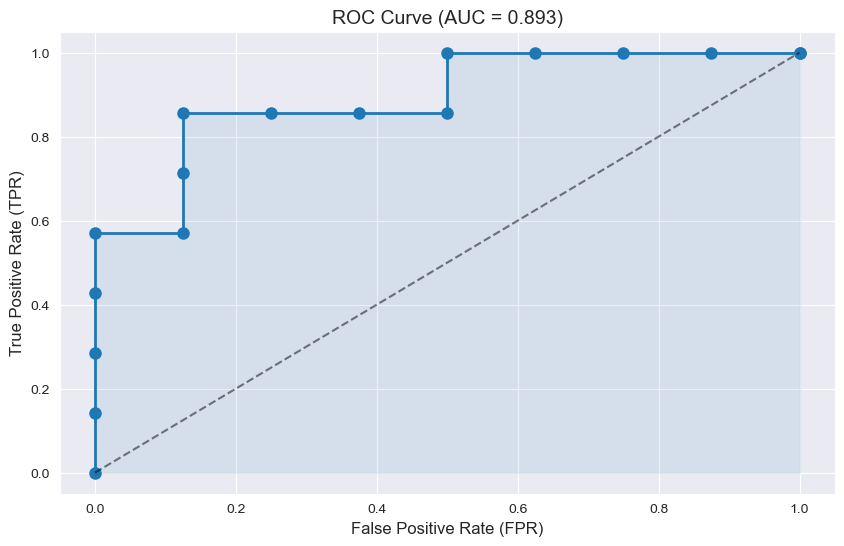

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 1.4.3节手算数据点（按FPR升序排列）
fpr = np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.1250, 0.1250, 0.1250, 
                0.2500, 0.3750, 0.5000, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
tpr = np.array([0.1429, 0.2857, 0.4286, 0.5714, 0.5714, 0.7143, 0.8571, 
                0.8571, 0.8571, 0.8571, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

# 添加起点 (0,0) 和终点 (1,1)（如果尚未包含）
fpr = np.insert(fpr, 0, 0.0)
tpr = np.insert(tpr, 0, 0.0)
fpr = np.append(fpr, 1.0)
tpr = np.append(tpr, 1.0)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # 随机猜测线

# 计算AUC（梯形法则）
auc = np.trapz(tpr, fpr)
plt.fill_between(fpr, tpr, alpha=0.1, color='#1f77b4')  # 填充AUC区域

# 图表标注
plt.title('ROC Curve (AUC = %.3f)' % auc, fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# 增加网格线
plt.grid(True)

# 渲染并显示图表
plt.show()

## sklearn绘制ROC曲线

### roc_curve

- `y_true`: 真实标签。
- `y_score`: 预测分数/概率。
- `pos_label`: 指定正类标签。
- `drop_intermediate`: 是否丢弃对ROC曲线无贡献的中间阈值点（默认 True）。

### 代码实现

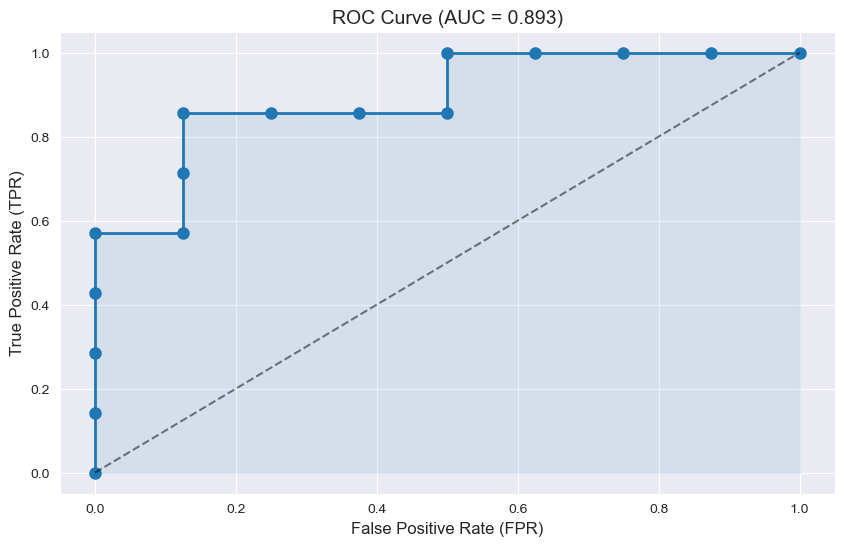

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 真实标签和预测概率
y_true = np.array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])
y_score = np.array([0.78, 0.49, 0.09, 0.23, 0.37, 0.56, 0.43, 0.40, 
                    0.26, 0.25, 0.89, 0.90, 0.63, 0.58, 0.16])

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)
auc = roc_auc_score(y_true, y_score)

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # 随机猜测线

# 填充AUC区域
plt.fill_between(fpr, tpr, alpha=0.1, color='#1f77b4')  

# 图表标注
plt.title('ROC Curve (AUC = %.3f)' % auc, fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# 增加网格线
plt.grid(True)

# 渲染并显示图表
plt.show()

# AUC（Area Under the Curve）

## AUC基本原理

**AUC（Area Under the Curve）**是机器学习中用于评估二分类模型性能指标，也即ROC曲线下的面积。

AUC的取值范围在 0.5 到 1 之间：
- **AUC = 1**：表示模型完美分类，所有正例和负例都能被正确区分。
- **0.5 < AUC < 1**：表示模型有一定的区分能力，AUC越大，分类能力越强。
- **AUC = 0.5**：表示模型没有分类能力，相当于随机猜测。
- **AUC < 0.5**：表示模型的分类能力比随机还差。

## AUC优缺点

### AUC的优点

- **对阈值不敏感**：AUC 计算的是整体分类能力，不依赖于特定的阈值。
- **适用于不均衡数据集**：在类别不均衡的情况下，AUC 仍能较好地评估模型效果。
- **直观**：ROC曲线和AUC值提供了模型性能的直观表示

### AUC的缺点

- 仅关注排序能力，不反映预测概率的绝对准确性。
- 在极端类别不平衡时（如正样本极少），可能高估模型性能（此时可结合PR曲线分析）。

## sklearn计算AUC

### roc_auc_score

- `y_true`: 真实标签。
- `y_score`: 预测分数/概率。

### 代码实现

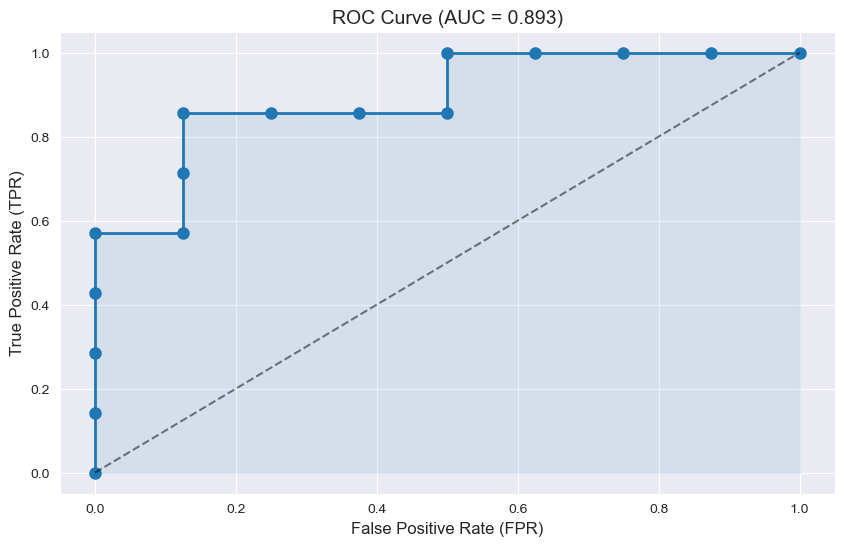

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# 设置Seaborn的风格和颜色调色板
sns.set_style("darkgrid")

# 真实标签和预测概率
y_true = np.array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])
y_score = np.array([0.78, 0.49, 0.09, 0.23, 0.37, 0.56, 0.43, 0.40, 
                    0.26, 0.25, 0.89, 0.90, 0.63, 0.58, 0.16])

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)
auc = roc_auc_score(y_true, y_score) # 计算AUC得分

# 绘制ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # 随机猜测线

# 填充AUC区域
plt.fill_between(fpr, tpr, alpha=0.1, color='#1f77b4')  

# 图表标注
plt.title('ROC Curve (AUC = %.3f)' % auc, fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# 增加网格线
plt.grid(True)

# 渲染并显示图表
plt.show()

### 手算验证

In [11]:
fpr, tpr

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.125, 0.125, 0.125, 0.25 ,
        0.375, 0.5  , 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
        0.57142857, 0.71428571, 0.85714286, 0.85714286, 0.85714286,
        0.85714286, 1.        , 1.        , 1.        , 1.        ,
        1.        ]))

In [12]:
(0.57142857*0.125)+(0.85714286*(0.5-0.125))+(1*(1-0.5))

0.89285714375